<a href="https://colab.research.google.com/github/krldlamini/edm_brazildengue/blob/main/CCM_Analysis/notebooks/Sao_Paulo_LaggedMT_CCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing pyEDM

In [ ]:
!pip install pyEDM

# Importing packages

In [ ]:
from pyEDM import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

# Uploading the data for analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Combined_Files/355030_A701_combined.csv'
data = pd.read_csv(file_path, delimiter = ',')

Dropping dates

In [ ]:
data = data.drop(columns = ['data'])

# Dropping NaNs in the DataFrame

In [ ]:
data = data.dropna()

In [ ]:
len(data)

780

# Finding the right embedding dimension

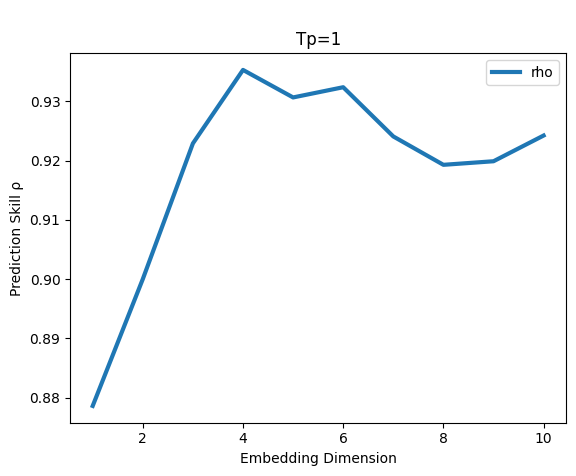

In [ ]:
rho_E = EmbedDimension(dataFrame = data, columns = 'cases',
                        target = 'cases', lib = '1 780',
                        pred = '1 780', showPlot = True)

In [ ]:
rho_E

,E,rho
0,1.0,0.878601
1,2.0,0.900019
2,3.0,0.922919
3,4.0,0.935328
4,5.0,0.930683
5,6.0,0.932407
6,7.0,0.924097
7,8.0,0.919306
8,9.0,0.919910
9,10.0,0.924251


# Normalizing the data

In [ ]:
data_norm = (data-data.mean())/data.std()

In [ ]:
data_norm

,Unnamed: 0,cases,precipitacao_total_horario,temperatura_maxima_na_hora_ant,temperatura_minima_na_hora_ant,umidade_rel_max_na_hora_ant,umidade_rel_min_na_hora_ant
0,-1.727601,-0.290409,-0.546010,0.811546,0.889999,0.432964,0.416788
1,-1.723172,-0.253223,0.527707,0.603245,0.711770,0.745877,0.712455
2,-1.718742,-0.245139,-0.071201,0.684874,0.754632,1.125602,1.082240
3,-1.714312,-0.266157,-0.103574,0.837980,0.897872,0.985214,0.913863
4,-1.709882,-0.251606,3.220093,1.238072,1.272768,0.870010,0.709035
...,...,...,...,...,...,...,...
776,1.709916,-0.266157,-0.594570,0.673454,0.629544,-0.236841,-0.268000
777,1.714346,-0.249989,-0.578384,0.006470,-0.055600,-0.915102,-0.911700
778,1.718776,-0.230588,2.346012,0.633486,0.668907,1.370859,1.323930
779,1.723206,-0.240289,-0.394935,0.436182,0.346564,-0.566669,-0.657926


# Doing Extended or Lagged CCM

## Optimal Lag for minimum temperature

In [ ]:
inf_temp_mean = []
temp_inf_mean = []
inf_temp_std = []
temp_inf_std = []
tps = np.arange(-12,2,1)

for tp in tps:
  print(tp)
  a = CCM( dataFrame = data_norm, E = 4, Tp = tp,
     columns = 'cases', target = 'temperatura_minima_na_hora_ant',
     libSizes = '10 720 10', sample = 10)
  inf_temp_mean.append(np.mean(a['cases:temperatura_minima_na_hora_ant'].iloc[-50:-1]))
  temp_inf_mean.append(np.mean(a['temperatura_minima_na_hora_ant:cases'].iloc[-50:-1]))
  inf_temp_std.append(np.std(a['cases:temperatura_minima_na_hora_ant'].iloc[-50:-1]))
  temp_inf_std.append(np.std(a['temperatura_minima_na_hora_ant:cases'].iloc[-50:-1]))

-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1


## CCM plotting in the convergent causal relationship

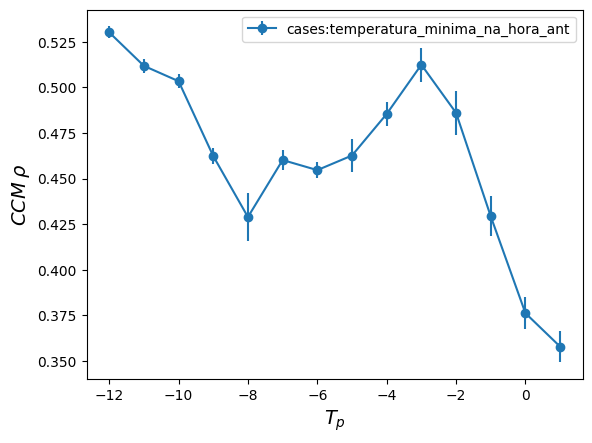

In [ ]:
plt.errorbar(tps,inf_temp_mean, inf_temp_std, marker = 'o', label = 'cases:temperatura_minima_na_hora_ant')
plt.xlabel(r'$T_{p}$', fontsize = 14)
plt.ylabel(r'$CCM \: \rho$', fontsize = 14)
plt.legend() # uncomment to show label if you want
plt.show()

## Optimal lag for maximum temperature

In [ ]:
inf_temp_mean = []
temp_inf_mean = []
inf_temp_std = []
temp_inf_std = []
tps = np.arange(-12,2,1)

for tp in tps:
  print(tp)
  a = CCM( dataFrame = data_norm, E = 4, Tp = tp,
     columns = 'cases', target = 'temperatura_maxima_na_hora_ant',
     libSizes = '10 720 10', sample = 10)
  inf_temp_mean.append(np.mean(a['cases:temperatura_maxima_na_hora_ant'].iloc[-50:-1]))
  temp_inf_mean.append(np.mean(a['temperatura_maxima_na_hora_ant:cases'].iloc[-50:-1]))
  inf_temp_std.append(np.std(a['cases:temperatura_maxima_na_hora_ant'].iloc[-50:-1]))
  temp_inf_std.append(np.std(a['temperatura_maxima_na_hora_ant:cases'].iloc[-50:-1]))

-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1


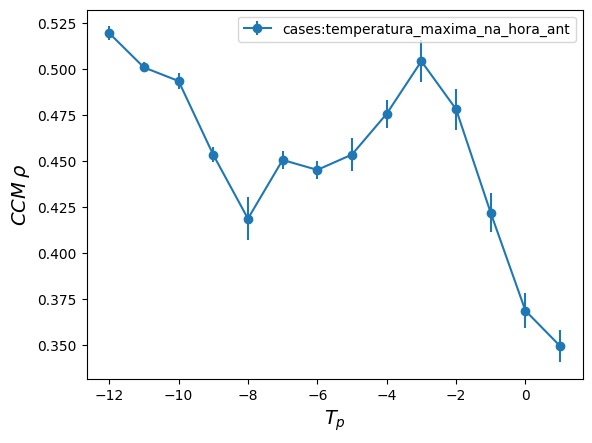

In [ ]:
plt.errorbar(tps,inf_temp_mean, inf_temp_std, marker = 'o', label = 'cases:temperatura_maxima_na_hora_ant')
plt.xlabel(r'$T_{p}$', fontsize = 14)
plt.ylabel(r'$CCM \: \rho$', fontsize = 14)
plt.legend() # uncomment to show label if you want
plt.show()

## Optimal lag for total precipitation

In [ ]:
inf_precip_mean = []
precip_inf_mean = []
inf_precip_std = []
precip_inf_std = []
tps = np.arange(-12,2,1)

for tp in tps:
  print(tp)
  a = CCM( dataFrame = data_norm, E = 4, Tp = tp,
     columns = 'cases', target = 'precipitacao_total_horario',
     libSizes = '10 720 10', sample = 10 )
  inf_precip_mean.append(np.mean(a['cases:precipitacao_total_horario'].iloc[-50:-1]))
  precip_inf_mean.append(np.mean(a['precipitacao_total_horario:cases'].iloc[-50:-1]))
  inf_precip_std.append(np.std(a['cases:precipitacao_total_horario'].iloc[-50:-1]))
  precip_inf_std.append(np.std(a['precipitacao_total_horario:cases'].iloc[-50:-1]))

-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1


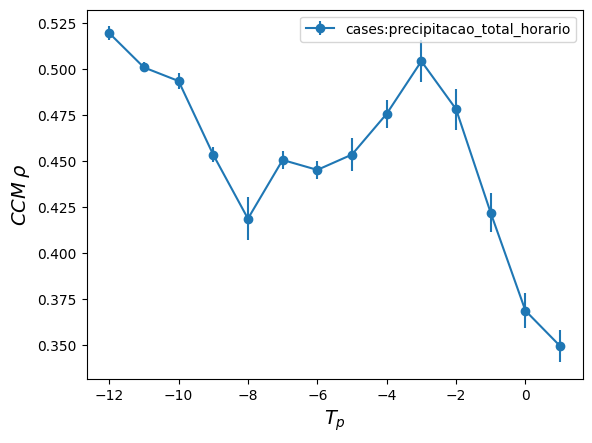

In [ ]:
plt.errorbar(tps,inf_temp_mean, inf_temp_std, marker = 'o', label = 'cases:precipitacao_total_horario')
plt.xlabel(r'$T_{p}$', fontsize = 14)
plt.ylabel(r'$CCM \: \rho$', fontsize = 14)
plt.legend() # uncomment to show label if you want
plt.show()

# Combining the results

In [ ]:
results = pd.DataFrame({
    'Lags we have used': tps,
    'Mean of cases:min temperature': inf_temp_mean,
    'Std Dev of cases:min temperature': inf_temp_std,
    'Mean of min temperature:cases': temp_inf_mean,
    'Std Dev of min temperature:cases': temp_inf_std
})

In [ ]:
sorted_results = results.sort_values('Mean of cases:min temperature', ascending = False)
sorted_results

,Lags we have used,Mean of cases:min temperature,Std Dev of cases:min temperature,Mean of min temperature:cases,Std Dev of min temperature:cases
0,-12,0.519727,0.003618,0.136930,0.009655
9,-3,0.504428,0.011349,0.030632,0.007346
1,-11,0.501056,0.002728,0.151800,0.010374
2,-10,0.493648,0.004571,0.175806,0.008884
10,-2,0.478352,0.011082,0.022024,0.009568
8,-4,0.475830,0.007633,0.034359,0.009190
7,-5,0.453655,0.008861,0.042260,0.010058
3,-9,0.453526,0.004187,0.197186,0.019850
5,-7,0.450713,0.005110,0.110164,0.007652
6,-6,0.445307,0.005019,0.066752,0.008730
